# Project Title: Analyzing Crime in Los Angeles
## Author: Haseeb
## Objective: 
The goal of this project is to analyze crimes Dataset to answer the following questions: 

### Key Questions to Answer:
1. Which hour has the highest frequency of crimes?

2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

3. Identify the number of crimes committed against victims of different age groups.

## Instructions:

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

### The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

### crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd     # For data manipulation
import numpy as np      # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns   # For advanced visualization

# This line ensures your charts show up inside the notebook
%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv('crimes.csv')  # Load your dataset

In [3]:
print(df.head())  # Display the first few rows of the dataframe

       DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0  220314085  2022-07-22  2020-05-12      1110    Southwest   
1  222013040  2022-08-06  2020-06-04      1620      Olympic   
2  220614831  2022-08-18  2020-08-17      1200    Hollywood   
3  231207725  2023-02-27  2020-01-27       635  77th Street   
4  220213256  2022-07-14  2020-07-14       900      Rampart   

         Crm Cd Desc  Vict Age Vict Sex Vict Descent Weapon Desc  Status Desc  \
0  THEFT OF IDENTITY        27        F            B         NaN  Invest Cont   
1  THEFT OF IDENTITY        60        M            H         NaN  Invest Cont   
2  THEFT OF IDENTITY        28        M            H         NaN  Invest Cont   
3  THEFT OF IDENTITY        37        M            H         NaN  Invest Cont   
4  THEFT OF IDENTITY        79        M            B         NaN  Invest Cont   

                                  LOCATION  
0  2500 S  SYCAMORE                     AV  
1  3300    SAN MARINO                   ST  

In [4]:
print(df.tail())  # Display the last few rows of the dataframe

            DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
185710  231510379  2023-05-29  2023-05-25      1100  N Hollywood   
185711  231604807  2023-01-27  2023-01-26      1800     Foothill   
185712  231606525  2023-03-22  2023-03-22      1000     Foothill   
185713  231210064  2023-04-12  2023-04-12      1630  77th Street   
185714  230906458  2023-03-05  2023-03-05       900     Van Nuys   

                                              Crm Cd Desc  Vict Age Vict Sex  \
185710                                 BUNCO, GRAND THEFT        25        M   
185711  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        23        M   
185712     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        25        F   
185713     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        29        M   
185714           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        53        F   

       Vict Descent                                     Weapon Desc  \
185710            W                    

## Data Inspection

In [5]:
# 1. See column types and missing values
print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [6]:
# 2. Count exactly how many missing values are in each column
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 3. Count total rows with at least one missing value
print('\n\nTotal rows with missing values:')
print(df.isnull().any(axis=1).sum())  


--- Missing Values ---
DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64


Total rows with missing values:
112217


In [7]:
print('Sample of missing rows:')
print(df[df.isnull().any(axis=1)].head(10))  # Display a sample of rows with missing values

Sample of missing rows:
        DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0   220314085  2022-07-22  2020-05-12      1110    Southwest   
1   222013040  2022-08-06  2020-06-04      1620      Olympic   
2   220614831  2022-08-18  2020-08-17      1200    Hollywood   
3   231207725  2023-02-27  2020-01-27       635  77th Street   
4   220213256  2022-07-14  2020-07-14       900      Rampart   
5   221216052  2022-07-07  2020-02-23      1000  77th Street   
6   221515929  2022-10-10  2020-04-01      1200  N Hollywood   
7   231906599  2023-03-03  2020-01-14      1335      Mission   
8   231207476  2023-02-27  2020-08-15         1  77th Street   
10  221711184  2022-06-15  2020-05-15       155   Devonshire   

          Crm Cd Desc  Vict Age Vict Sex Vict Descent Weapon Desc  \
0   THEFT OF IDENTITY        27        F            B         NaN   
1   THEFT OF IDENTITY        60        M            H         NaN   
2   THEFT OF IDENTITY        28        M            H         Na

In [8]:
# 3. Get a statistical summary (Check 'Vict Age' and 'TIME OCC' specifically)
print("\n--- Statistical Summary ---")
df.describe()


--- Statistical Summary ---


,DR_NO,TIME OCC,Vict Age
count,1.857150e+05,185715.000000,185715.000000
mean,2.255781e+08,1300.024414,39.999257
std,5.017438e+06,655.753163,15.450227
min,2.009072e+08,1.000000,2.000000
25%,2.210108e+08,830.000000,28.000000
50%,2.220114e+08,1340.000000,37.000000
75%,2.310044e+08,1830.000000,50.000000
max,2.399097e+08,2359.000000,99.000000


## Data Cleaning

## EDA (Exploratory Analysis)

<details>
<summary><b>Seaborn Palettes Guide</b></summary>

Here are the most common values categorized by their use case:

### 1. Seaborn Built-in Palettes
These are great for categorical data (e.g., different areas or age groups).

- deep (default)
- muted
- pastel
- bright
- dark
- colorblind (Optimized for accessibility)

### 2. Perceptually Uniform Palettes
These are the most professional options for showing gradients or order (like your crime hours). They are easy to read even in grayscale.

- viridis
- plasma
- inferno
- magma (The one we used for the crime project)
- cividis
- rocket
- mako
- flare
- crest

### 3. Sequential Palettes
Best for data that goes from "Low" to "High."

- Blues, Greens, Reds, Purples, Greys, Oranges
- YlGnBu (Yellow-Green-Blue)
- BuGn (Blue-Green)
- GnBu (Green-Blue)

### 4. Diverging Palettes
Best when the data has a meaningful middle point (like temperature or profit/loss).

- vlag
- icefire
- coolwarm
- RdBu (Red-Blue)
- BrBG (Brown-Blue-Green)
- Spectral

### 5. Qualitative (ColorBrewer)
Best for distinct categories that have no natural order.

- Set1, Set2, Set3
- Paired
- Accent
- Dark2

### Tip for your Project:
If you want to use a palette in reverse (e.g., making the highest bars dark instead of light), just add _r to the end of any name:

- magma_r

- viridis_r

- Blues_r

</details>

In [9]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

### Question: Which hour has the highest frequency of crimes?


Hour with highest crimes frequency: 12 with 13663 occurrences


C:\Users\HSB\AppData\Local\Temp\ipykernel_12220\2574268253.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='RdBu', legend=False, order=df['hour'].value_counts().index)


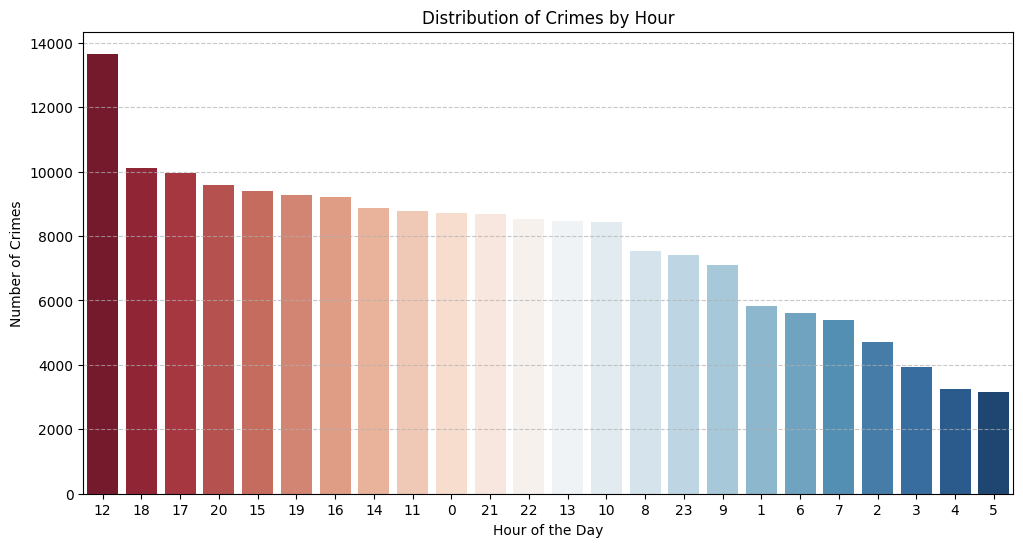

In [10]:
# Extract the hour using integer division (// 100)
df['hour'] = df['TIME OCC'] // 100

hour_with_highest_crimes_frequency = {
    'hour': df['hour'].value_counts().idxmax(),
    'frequency': df['hour'].value_counts().max()
}

print(f"\nHour with highest crimes frequency: {hour_with_highest_crimes_frequency['hour']} with {hour_with_highest_crimes_frequency['frequency']} occurrences")

# Visualize the distribution of crimes by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='RdBu', legend=False, order=df['hour'].value_counts().index)
plt.title('Distribution of Crimes by Hour')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.show()

### Result: Hour with highest crimes frequency: 12 with 13663 occurrences

### Question: Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?


Total crimes between 10 PM and 4 AM: 39183

Area with most crimes between 10 PM and 4 AM: Central with 3312 occurrences


C:\Users\HSB\AppData\Local\Temp\ipykernel_12220\2168415717.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='AREA NAME', data=hour_filtered_df, palette='rocket', order=hour_filtered_df['AREA NAME'].value_counts().index)


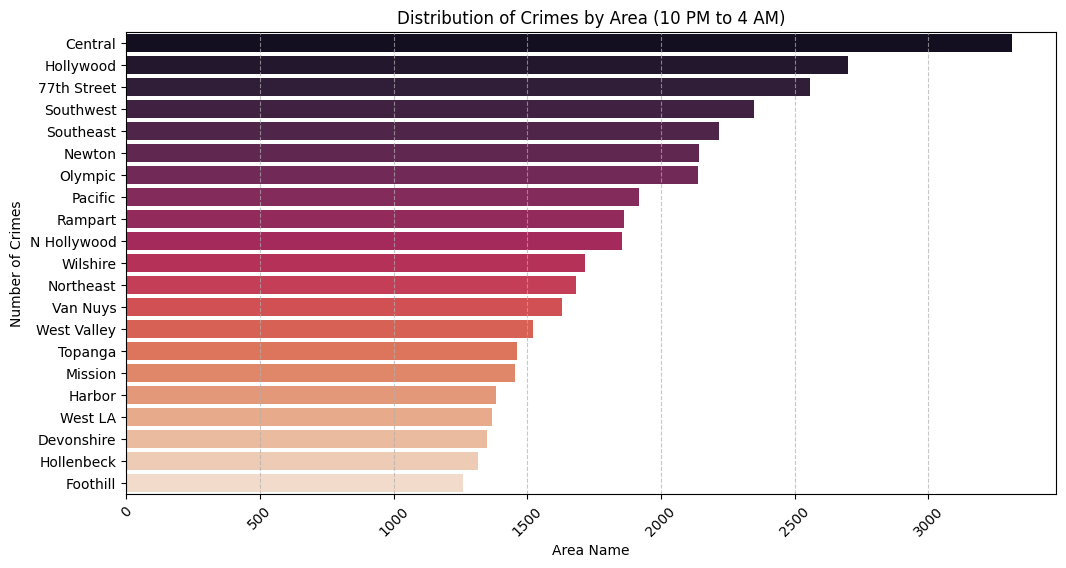

In [11]:
# Filter data for crimes occurring between 10 PM and 4 AM
hour_filtered_df = df[(df['hour'] >= 22) | (df['hour'] < 4)]
print(f"\nTotal crimes between 10 PM and 4 AM: {len(hour_filtered_df)}")

# Identify area with the most crimes during these hours
areas_with_most_night_crimes = {
    'area': hour_filtered_df['AREA NAME'].value_counts().idxmax(),
    'frequency': hour_filtered_df['AREA NAME'].value_counts().max()
}
print(f"\nArea with most crimes between 10 PM and 4 AM: {areas_with_most_night_crimes['area']} with {areas_with_most_night_crimes['frequency']} occurrences")

# Visualize the distribution of crimes by area during these hours
plt.figure(figsize=(12, 6))
sns.countplot(y='AREA NAME', data=hour_filtered_df, palette='rocket', order=hour_filtered_df['AREA NAME'].value_counts().index)
plt.title('Distribution of Crimes by Area (10 PM to 4 AM)')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.show()

### Result: Area with most crimes between 10 PM and 4 AM: Central with 3312 occurrences

### Question: Identify the number of crimes committed against victims of different age groups.


Victims' Age Group Distribution:
Age Group: 0-17, Frequency: 4528
Age Group: 18-25, Frequency: 28291
Age Group: 26-34, Frequency: 47470
Age Group: 35-44, Frequency: 42157
Age Group: 45-54, Frequency: 28353
Age Group: 55-64, Frequency: 20169
Age Group: 65+, Frequency: 14747


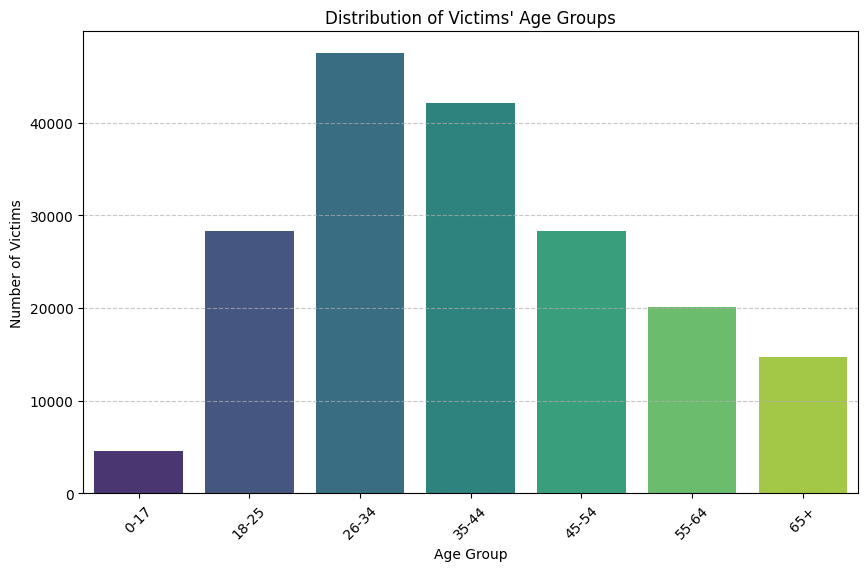

In [12]:
# defining age bins and labels for "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+"
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column 'age_group' based on the defined bins
df['age_group'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels, right=True) # line explnation: This line creates a new column 'age_group' in the DataFrame 'df' by categorizing the 'Vict Age' values into specified age ranges (bins) using the pd.cut() function. The 'bins' parameter defines the edges of the age groups, while the 'labels' parameter assigns a label to each bin for easier interpretation. The 'right=True' argument indicates that the bins include the right edge, meaning that an age of 17 would fall into the "0-17" group.

# Analyze the distribution of victims' age groups
age_group_distribution = {
    'age_group': df['age_group'].value_counts(sort=False).index.tolist(),
    'frequency': df['age_group'].value_counts(sort=False).tolist()
}

print("\nVictims' Age Group Distribution:")
for age_group, frequency in zip(age_group_distribution['age_group'], age_group_distribution['frequency']):
    print(f"Age Group: {age_group}, Frequency: {frequency}")

# Visualize the distribution of victims' age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='viridis', hue='age_group')
plt.title("Distribution of Victims' Age Groups")
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Result: Victims' Age Group Distribution:
- Age Group: 0-17, Frequency: 4528
- Age Group: 18-25, Frequency: 28291
- Age Group: 26-34, Frequency: 47470
- Age Group: 35-44, Frequency: 42157
- Age Group: 45-54, Frequency: 28353
- Age Group: 55-64, Frequency: 20169
- Age Group: 65+, Frequency: 14747

## Conclusion

## Summary of Findings: Los Angeles Crime Analysis

After analyzing **185,715** LAPD crime records, the following insights were found:

1. **Peak Crime Hour**: The highest frequency of crimes occurred at **12:00 (hour = 12)** with **13,663** reported incidents.

2. **Night Crime Hotspot (10 PM–3:59 AM)**: The area with the largest frequency of night crimes was **Central**, with **3,312** incidents during those hours.

3. **Victim Age Groups (Crime Counts)**:
   - **0–17**: 4,528  
   - **18–25**: 28,291  
   - **26–34**: 47,470  
   - **35–44**: 42,157  
   - **45–54**: 28,353  
   - **55–64**: 20,169  
   - **65+**: 14,747  

**Conclusion**: Crime frequency peaks around midday, **Central** is the most affected area during late-night hours, and victims are most commonly in the **26–34** and **35–44** age groups.